In [9]:
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import numpy as np




In [2]:
## collecting stock price data 
yfin.pdr_override()
start = '2019-12-01'
end = '2022-12-31'

stocks = ['AAPL']

df = pdr.get_data_yahoo(stocks, start, end)
lowHigh = df[['Open','Close']]
lowHigh = lowHigh.fillna(method='ffill')
lowHigh.head()
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,66.817497,67.062500,65.862503,66.040001,64.599274,94487200
2019-12-03,64.577499,64.882500,64.072502,64.862503,63.447472,114430400
2019-12-04,65.267502,65.827499,65.169998,65.434998,64.007454,67181600
2019-12-05,65.947502,66.472504,65.682503,66.394997,64.946526,74424400
2019-12-06,66.870003,67.750000,66.824997,67.677498,66.201050,106075600
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


In [3]:
## analysing the stock price data

In [4]:
# Retrieve data for Sept 2022
symbol = "AAPL"
start_date = "2022-07-01"
end_date = "2022-07-31"
data = yfin.download(symbol, start=start_date, end=end_date)

# Extract the adjusted close price
adj_close = data["Adj Close"]
adj_close


[*********************100%***********************]  1 of 1 completed


Date
2022-07-01    138.296356
2022-07-05    140.914368
2022-07-06    142.268158
2022-07-07    145.682526
2022-07-08    146.369385
2022-07-11    144.209274
2022-07-12    145.194763
2022-07-13    144.826447
2022-07-14    147.792862
2022-07-15    149.485092
2022-07-18    146.399261
2022-07-19    150.311325
2022-07-20    152.342010
2022-07-21    154.641495
2022-07-22    153.387222
2022-07-25    152.252426
2022-07-26    150.908585
2022-07-27    156.074905
2022-07-28    156.632355
2022-07-29    161.768814
Name: Adj Close, dtype: float64

<AxesSubplot:title={'center':'AAPL Adjusted Close Price - July 2022'}, xlabel='Date', ylabel='Price ($)'>

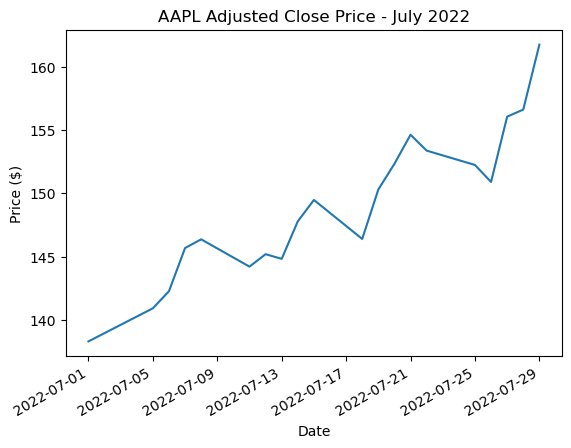

In [5]:
##plotting the adj close price 
adj_close.plot(title="AAPL Adjusted Close Price - July 2022", ylabel="Price ($)")
## plt.figure(figsize=(30,7))


<AxesSubplot:title={'center':'AAPL Daily Returns - July 2022'}, xlabel='Date', ylabel='Daily Returns'>

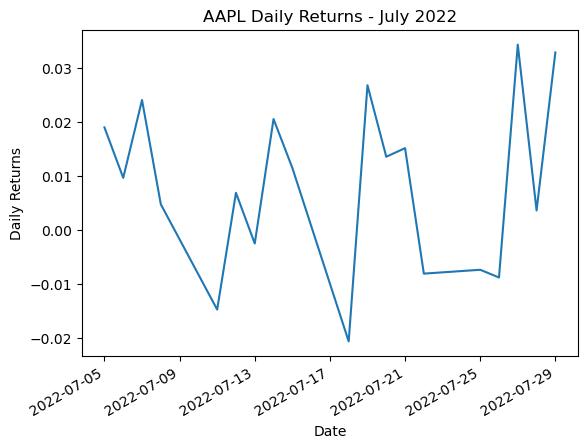

In [15]:
daily_returns = adj_close.pct_change()
daily_returns.plot(title="AAPL Daily Returns - July 2022", ylabel="Daily Returns")


<AxesSubplot:title={'center':'AAPL Cumulative Daily Returns - July 2021'}, xlabel='Date', ylabel='Cumulative Returns'>

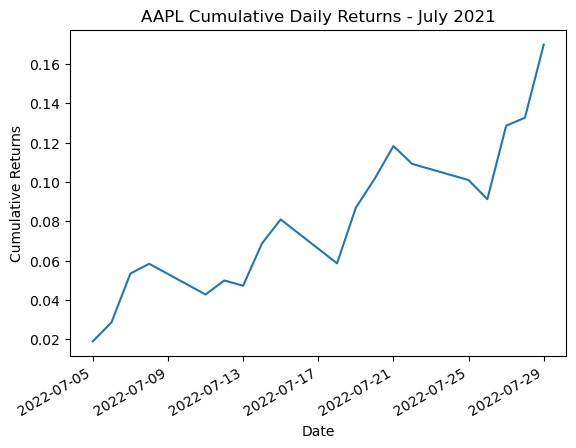

In [7]:
## cummulative return
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.plot(title="AAPL Cumulative Daily Returns - July 2021", ylabel="Cumulative Returns")


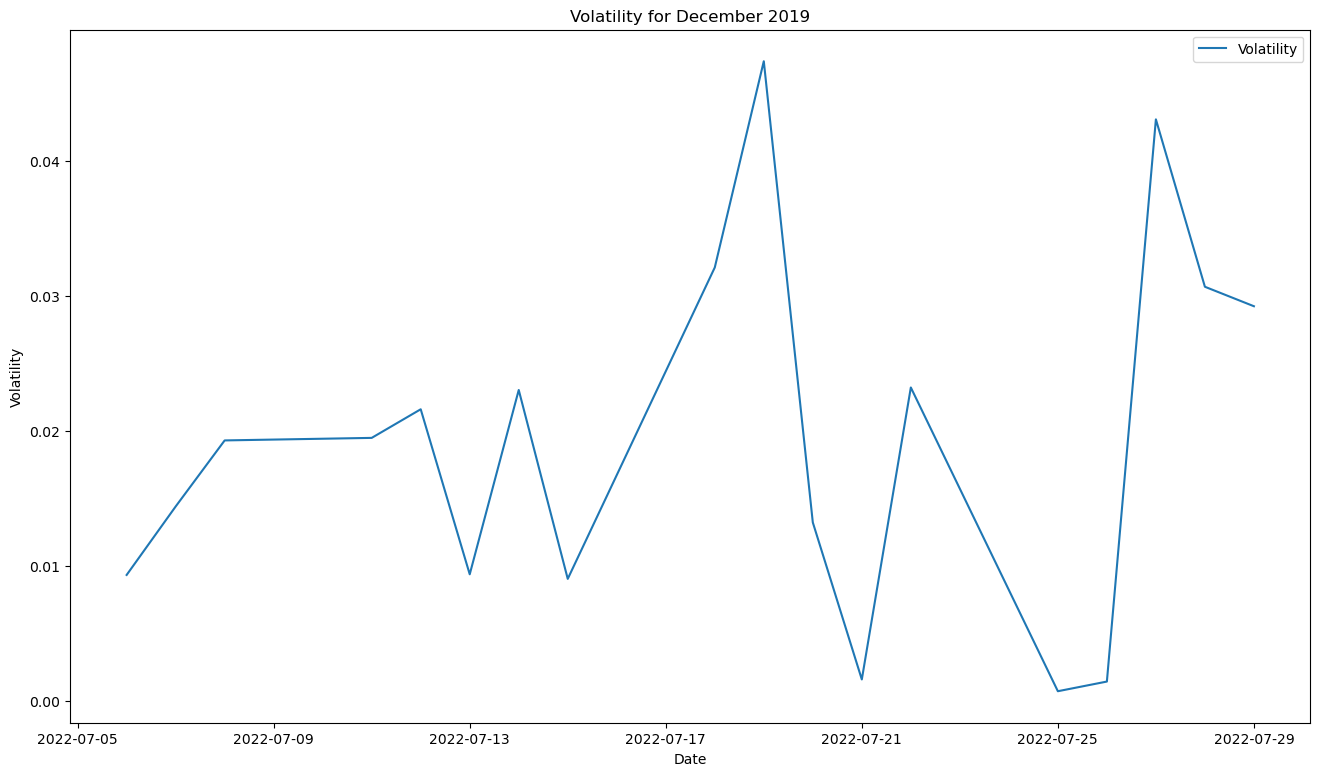

Date
2022-07-01         NaN
2022-07-05         NaN
2022-07-06    0.009323
2022-07-07    0.014392
2022-07-08    0.019285
2022-07-11    0.019473
2022-07-12    0.021592
2022-07-13    0.009370
2022-07-14    0.023019
2022-07-15    0.009033
2022-07-18    0.032093
2022-07-19    0.047365
2022-07-20    0.013212
2022-07-21    0.001584
2022-07-22    0.023205
2022-07-25    0.000713
2022-07-26    0.001428
2022-07-27    0.043061
2022-07-28    0.030663
2022-07-29    0.029221
Name: Adj Close, dtype: float64

In [29]:
## volatility = daily_returns.std()
#print(f"Volatility for AAPL in July 2021: {volatility:.4f}")

# Calculate volatility
min_period = 2
volatility = daily_returns.rolling(min_period).std()*np.sqrt(min_period)

# Plot volatility
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(volatility.index, volatility, label='Volatility')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('Volatility for December 2019')
ax.legend()
plt.show()

volatility

#maybe it indicates a stock with lower volatility 

In [75]:
## Moving Average Cross Over Trading STrategy

In [76]:
# Retrieve data
symbol = "AAPL"
start_date = "2019-12-01"
end_date = "2022-12-31"
data = yfin.download(symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [77]:
short_window = 50
long_window = 200

# Create short-term and long-term window periods
short_window_prices = data["Close"].rolling(window=short_window).mean()
long_window_prices = data["Close"].rolling(window=long_window).mean()


In [78]:
# Create Signal column
data["Signal"] = 0
data["Signal"] = data["Signal"].where(short_window_prices < long_window_prices, 1)
data["Signal"] = data["Signal"].where(short_window_prices > long_window_prices, -1)


In [79]:
# Identify buy and sell signals
data["Buy"] = data["Signal"].shift(1) == -1
data["Sell"] = data["Signal"].shift(1) == 1


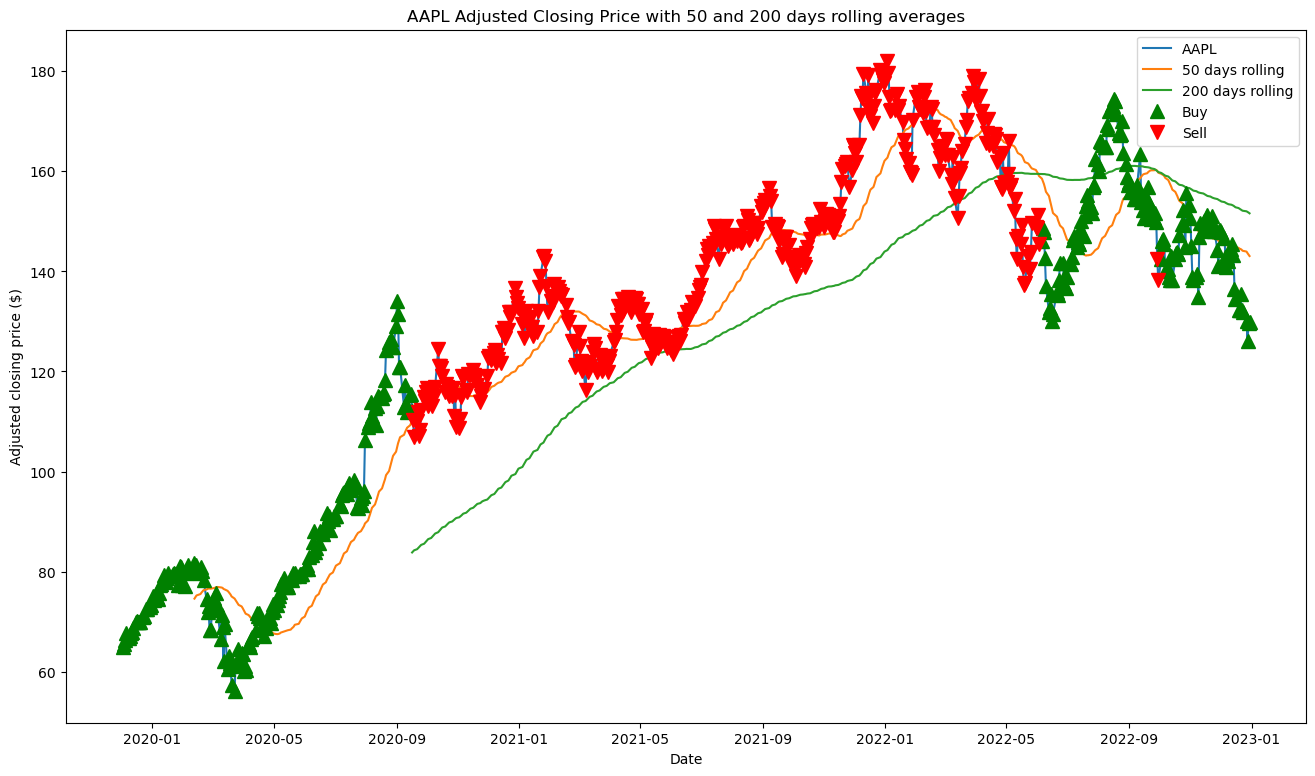

In [80]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.index, data['Close'], label='AAPL')
ax.plot(short_window_prices.index, short_window_prices, label='50 days rolling')
ax.plot(long_window_prices.index, long_window_prices, label='200 days rolling')

# Plot buy and sell signals
ax.plot(data.loc[data["Buy"]].index, data["Close"][data["Buy"]], '^', markersize=10, color='green', label='Buy')
ax.plot(data.loc[data["Sell"]].index, data["Close"][data["Sell"]], 'v', markersize=10, color='red', label='Sell')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.set_title('AAPL Adjusted Closing Price with 50 and 200 days rolling averages')
ax.legend()

plt.show()





